# Go Bike Database Analysis

## by Youmna Khaled

> I will be working on analysing the dataset for ford bikes that containes data related to the trip details , that include the user details, his type and the trip duration info. All trips that are started in Feb 2019


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.drop(['start_station_id','end_station_id','bike_id','start_station_latitude','start_station_name','end_time','end_station_name','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_share_for_all_trip'], axis=1, inplace=True)
df=df.dropna()
df.member_birth_year = df['member_birth_year'].astype(int)
df.start_time = pd.to_datetime(df.start_time)
df.member_gender = df['member_gender'].astype('category')
df['duration_minutes'] = df['duration_sec']/60
df.drop(['duration_sec'], axis=1, inplace=True)
df['start_year'] = df.start_time.dt.year
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour
df.drop(['start_time'], axis=1, inplace=True)
df['age'] = df.start_year - df.member_birth_year
df.drop(['member_birth_year'], axis=1, inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

##  Distribution of durations.

>It looks like the mean of trip duration is around 10. Most trips lie between 5 and 20 mins.There also exists some outliers in the larger range values.



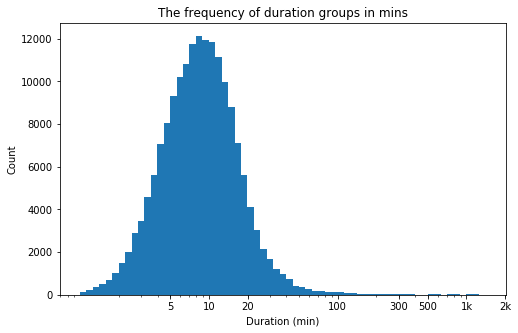

In [3]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['duration_minutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks([5,10,20,100,300,500, 1e3, 2e3], [5,10,20,100,300,500, '1k', '2k'])
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('The frequency of duration groups in mins')
plt.show()

## Distribution of  Gender Groups


>we can see that the datasets is biased as it contains more males than females ,so this should be kept in mind while facts finding

Text(0,0.5,'Percentage')

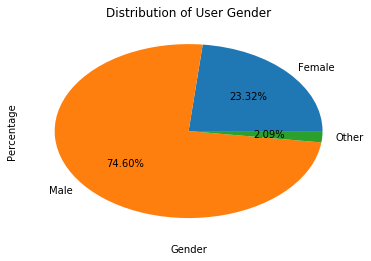

In [4]:
df.groupby('member_gender').size().plot(kind='pie', autopct='%1.2f%%');
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

## Relationship between duartion and gender


It is shown that both females show relatively equal performance in trip duration. This is ellaborated more in the upcoming plots .

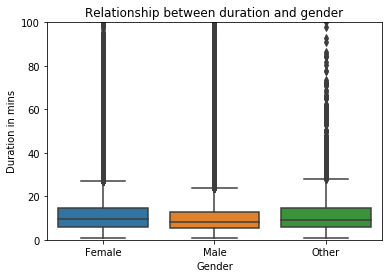

In [5]:
sb.boxplot(data = df,x='member_gender', y='duration_minutes')
plt.title('Relationship between duration and gender')
plt.xlabel('Gender')
plt.ylim(0,100)
plt.ylabel('Duration in mins')
plt.show()

Text(0,0.5,'Number of trips')

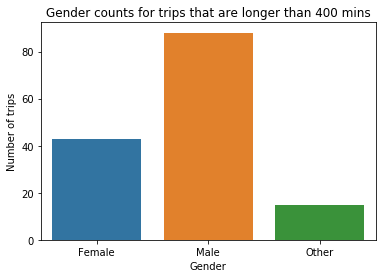

In [6]:
longDurations =df.query('duration_minutes > 400')
sb.countplot(data = longDurations, x = 'member_gender');
plt.title('Gender counts for trips that are longer than 400 mins')
plt.xlabel('Gender')
plt.ylabel('Number of trips')

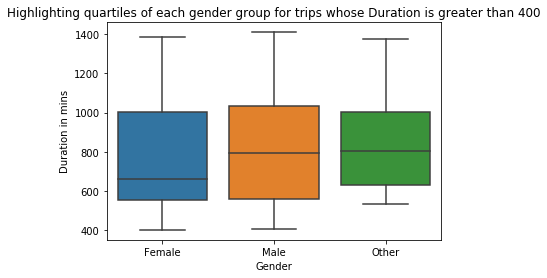

In [7]:
sb.boxplot(data = longDurations,x='member_gender', y='duration_minutes')
plt.title('Highlighting quartiles of each gender group for trips whose Duration is greater than 400')
plt.xlabel('Gender')
plt.ylabel('Duration in mins')
plt.show()

## Relationship between duartion ,gender and age.

This shows that for all gender groups, age has shown the same conslusion that is most rides are done by people who are around 20 to 40 years old. The plots also show that men do more long rides than women.Keep in mind that regarding the lond rides, men seem to have less mean trip durations than women.

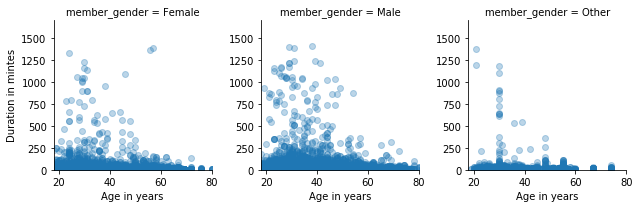

In [8]:
plot = sb.FacetGrid(data = df, col = 'member_gender',xlim = [18, 80], ylim = [0, 1700])
plot.map(plt.scatter, 'age', 'duration_minutes', alpha=0.3)
plot.set_xlabels('Age in years')
plot.set_ylabels('Duration in mintes')
plt.show()

## In conclusion

It has been proven that although men have done more high duration trips, females have done larger durations for the all age groups that are less than sixty.In addition the latest plot has shown that the reason why the avg of susbribers duration length is smaller in subscribers might be that there are more subscribers in the large age group , who is already proven to do trips smaller in durations.Finally,The most surprising feature has been the distribution of genders that may make anyone claim that men can have higher strengths in trips regarding duration, women has actually shown better strength in that.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [11]:
!jupyter nbconvert slideDeck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slideDeck.ipynb to slides
[NbConvertApp] Writing 405288 bytes to slideDeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slideDeck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 77

In [15]:
!jupyter nbconvert slideDeck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slideDeck.ipynb to slides
[NbConvertApp] Writing 398169 bytes to slideDeck.slides.html
